In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target # 0: Malignant, 1: Benign

# Standardize features (Crucial for SVM and Logistic Regression as they rely on distance-based or gradient-based optimizations)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [4]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True)
}

results = []

In [5]:
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    test_score = model.score(X_test, y_test)

    # Calculate Metrics
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Train Score": train_score,
        "Test Score": test_score
    }
    results.append(metrics)
# Generalization: We compare Train vs. Test scores. A high training score with a much lower test score indicates overfitting (common in Decision Trees).

In [6]:
comparison_df = pd.DataFrame(results).set_index("Model")
print(comparison_df)

                     Accuracy  Precision    Recall  F1-Score  Train Score  \
Model                                                                       
Logistic Regression  0.973684   0.972222  0.985915  0.979021     0.986813   
Decision Tree        0.947368   0.957746  0.957746  0.957746     1.000000   
Random Forest        0.964912   0.958904  0.985915  0.972222     1.000000   
SVM                  0.973684   0.972222  0.985915  0.979021     0.986813   

                     Test Score  
Model                            
Logistic Regression    0.973684  
Decision Tree          0.947368  
Random Forest          0.964912  
SVM                    0.973684  


In [11]:
display(comparison_df.T) # Transposes the table to show models as columns

Model,Logistic Regression,Decision Tree,Random Forest,SVM
Accuracy,0.973684,0.947368,0.964912,0.973684
Precision,0.972222,0.957746,0.958904,0.972222
Recall,0.985915,0.957746,0.985915,0.985915
F1-Score,0.979021,0.957746,0.972222,0.979021
Train Score,0.986813,1.000000,1.000000,0.986813
Test Score,0.973684,0.947368,0.964912,0.973684
Diff,0.013129,0.052632,0.035088,0.013129


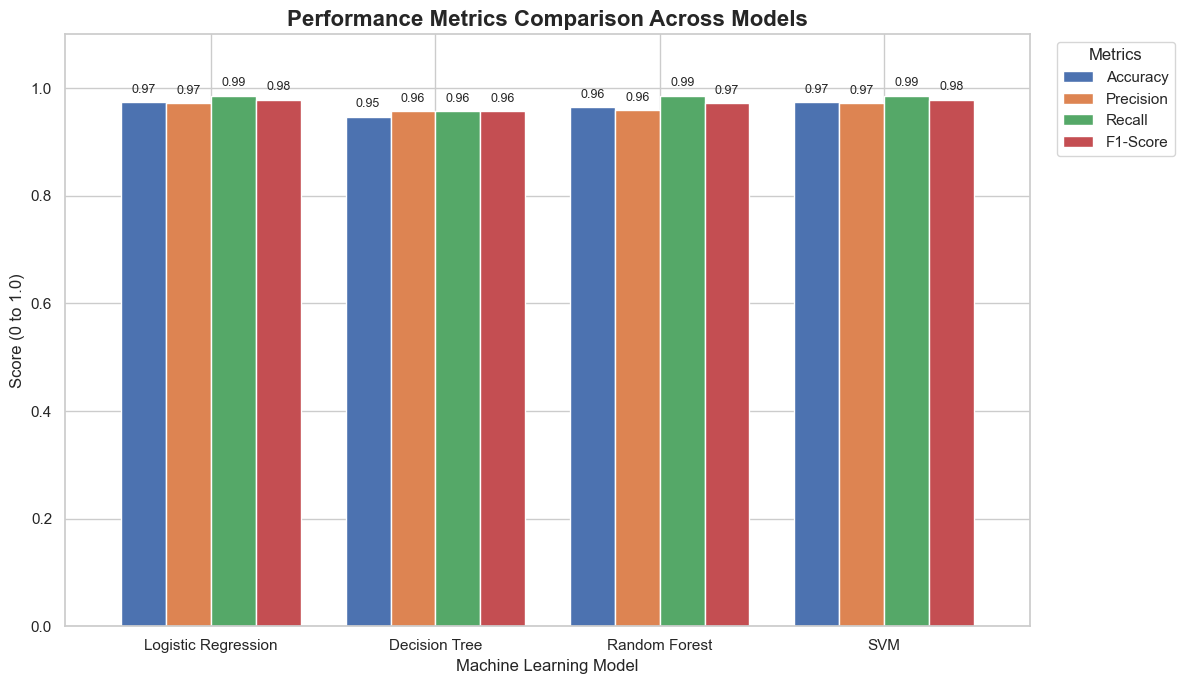

In [7]:
# Set a stylish theme
sns.set_theme(style="whitegrid")

# Select the core metrics for comparison
plot_df = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Create the grouped bar plot
ax = plot_df.plot(kind='bar', figsize=(12, 7), width=0.8)

# 1. Customizing Labels and Title
plt.title("Performance Metrics Comparison Across Models", fontsize=16, fontweight='bold')
plt.ylabel("Score (0 to 1.0)", fontsize=12)
plt.xlabel("Machine Learning Model", fontsize=12)
plt.xticks(rotation=0)  # Keeps model names horizontal for better reading

# 2. Adjust Legend
plt.legend(title="Metrics", bbox_to_anchor=(1.02, 1), loc='upper left', frameon=True)

# 3. Add Value Labels on top of each bar for precision
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=9)

# 4. Limit Y-axis to 1.1 for space for labels
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

In [8]:
# Comparing Train vs Test scores to check for overfitting
comparison_df['Diff'] = abs(comparison_df['Train Score'] - comparison_df['Test Score'])
best_gen_model = comparison_df['Diff'].idxmin()
print(f"\nModel that generalizes best (lowest train-test gap): {best_gen_model}")


Model that generalizes best (lowest train-test gap): Logistic Regression


In [9]:
# In medical diagnosis, Recall is often prioritized to minimize false negatives (missing cancer)
# For breast cancer, a False Negative (calling a malignant tumor "benign") is more dangerous than a False Positive. Therefore, the model with the highest Recall is typically chosen as the "best".
best_model_name = comparison_df['Recall'].idxmax()
print(f"Saving best model based on Recall: {best_model_name}")
joblib.dump(models[best_model_name], 'best_breast_cancer_model.pkl')

Saving best model based on Recall: Logistic Regression


['best_breast_cancer_model.pkl']

In [10]:
# Load the model from the file
loaded_model = joblib.load('best_breast_cancer_model.pkl')

# Verify by making a prediction (X_test must be preprocessed/scaled the same way)
prediction = loaded_model.predict(X_test)
print(f"Prediction for first test case: {prediction[0]}")

Prediction for first test case: 1
